In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
#import preprocessing_methods

In [7]:
def binary_to_3dbox(file):
    f_21cm = open(file,"rb")
    binary_21cm = f_21cm.read()
    np_float_array_21cm = np.fromstring(binary_21cm, np.float32)
    f_21cm.close()
    
    return np.reshape(np_float_array_21cm, (200,200,200))

In [8]:
# returns list of filenames in mypath
def filenames_in(mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/"):
    filenames = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f))]
    return filenames


In [9]:
# returns the file who's name includes the string includes
def get_bin21(filename_includes, category_includes="delta_T" ,mypath=None):
    if mypath: filenames = filenames_in(mypath)
    else: filenames = filenames_in() # use the default
    category = [i for i in fnames if category_includes in i]
    print("there are ",len(category),"files in the category :) ")#trace
    filename = [i for i in category if filename_includes in i]
    if len(filename)!=1: raise Exception("Error the number of files that match your description is not 1\nit is "+str(len(filename)))
    
    
    return filename[0]
    

In [10]:
# import the categories manually
fnames = filenames_in(mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/")

delta_fnames = [i for i in fnames if i[:5]=="delta"]
gamma_fnames = [i for i in fnames if i[:5]=="Gamma"]
nrec_fnames = [i for i in fnames if i[:4]=="Nrec"]
smoothed_fnames = [i for i in fnames if "smoothed" in i]
vx_fnames = [i for i in fnames if "_vx_" in i]
vy_fnames = [i for i in fnames if "_vy_" in i]
vz_fnames = [i for i in fnames if "_vz_" in i]
xh_nohalos_fnames = [i for i in fnames if "xH_nohalos" in i]
z_first_ionization_fnames = [i for i in fnames if "z_first"==i[:7]]

fname_sublist =[delta_fnames , gamma_fnames, nrec_fnames, smoothed_fnames, 
                vx_fnames,vy_fnames,vz_fnames,xh_nohalos_fnames,
                z_first_ionization_fnames]

In [11]:
# check that there are no filenames that are not in one of the sublists
fname_copy = fnames[:]
sublist_copy = fname_sublist[:]
print("len fname_copy before",len(fname_copy))
for sublist in sublist_copy:
    for j in sublist:
        fname_copy.remove(j)
print("len fname_copy after",len(fname_copy))
if len(fname_copy)==0:print("good, all the filenames are included in a category")
else:print("Warning not all filenames are included in a category")

len fname_copy before 155
len fname_copy after 0
good, all the filenames are included in a category


In [12]:
# check that each category is non-empty
for sublist in sublist_copy:
    if len(sublist)==0: print("the category",namestr(sublist)," is empty")# prints the variable name

## Looking at the data visually
The aim is broad, by and large I want to see what sort of data is in each type or category of file that I defined above. Also I wanna try to find which files are the ones that contain the density fields. I think they are the ones called updated smoothed data x (from my notes of my meeting with Prof. Adrien Liu)

In [13]:
def display_random_slices(filename_includes=".041347" , category_includes="delta_T",save_as=None):
    # get some filename
    mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/"
    fname = get_bin21(filename_includes=filename_includes,category_includes=category_includes,mypath=mypath)


    # import and display the data of fname
    data = binary_to_3dbox(mypath+fname)
    print(data.shape)#trace
    print("what the array looks like:")#trace
    i = random.choice(data)
    print(i)#trace
    print("min max mean")
    print(np.min(i), np.max(i), np.mean(i))

    # display random slices of the data
    plt.figure(figsize=(14,7))
    for i in range(3*2):
        plt.subplot(2,3,i+1)
        plt.imshow(random.choice(data),cmap=cm.plasma)

    if save_as: plt.savefig(save_as)
    plt.show()


Does the data need to be normalised for the color map to work well?

there are  17 files in the category :) 
there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[0.46266732 0.457258   0.45158082 ... 0.4770548  0.47258794 0.46778494]
 [0.46185195 0.4565905  0.4510609  ... 0.4757973  0.47147703 0.46682164]
 [0.4607488  0.45564485 0.4502724  ... 0.474226   0.47006047 0.46556133]
 ...
 [0.46334738 0.45755753 0.4515035  ... 0.47888502 0.47403455 0.46884778]
 [0.4634176  0.45774335 0.45180348 ... 0.47860327 0.47387066 0.46880135]
 [0.46319032 0.4576431  0.4518289  ... 0.47799203 0.47338727 0.4684462 ]]
min max mean
0.0 0.50737214 0.16478865


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


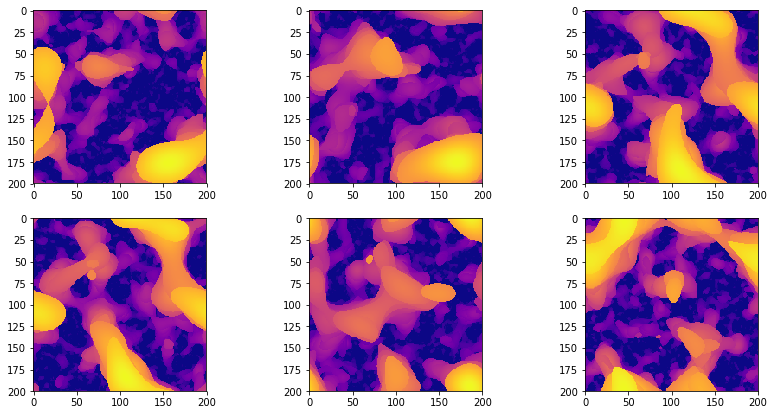

In [14]:
mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/"
fname = get_bin21(filename_includes="z006.00" , category_includes="Gamma12")

display_random_slices(filename_includes="z006.00", category_includes="Gamma12")
data = binary_to_3dbox(mypath+fname)

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[1.6770753  2.2315967  2.9470768  ... 0.36655357 0.5473981  1.0953027 ]
 [2.4959857  1.9402736  2.2623363  ... 0.2253151  0.41762483 1.1966519 ]
 [2.9240105  1.5573891  1.6608514  ... 0.25900722 0.3716517  1.2623273 ]
 ...
 [3.06861    2.9440775  1.4997475  ... 0.90774286 1.3844544  2.2673457 ]
 [2.1184545  2.557925   2.924275   ... 0.6334448  1.0960451  1.664105  ]
 [1.6001511  2.08287    3.2263758  ... 0.5669082  0.79607755 1.364719  ]]
min max mean
-1.3634562e-06 4.783432 0.33118618


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


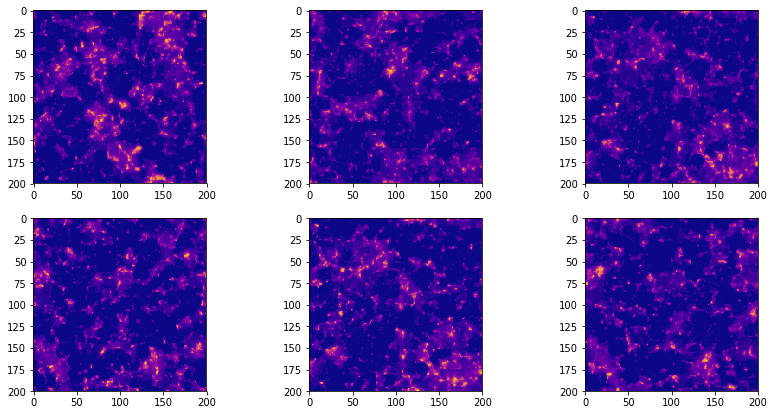

In [15]:
display_random_slices(filename_includes="z006.5" , category_includes="Nrec_z")

there are  18 files in the category :) 
(200, 200, 200)
what the array looks like:
[[ 0.        0.        0.       ... 10.060269 16.02552   0.      ]
 [ 0.        0.        0.       ... 10.053007 13.699925  0.      ]
 [ 0.        0.        0.       ... 12.783289 13.290285 13.730473]
 ...
 [17.307362 17.54423  13.278499 ... 13.419317 15.512989 13.423536]
 [ 0.       11.935541 11.924174 ... 12.695136  0.       15.658002]
 [ 0.        0.        0.       ... 10.237165 18.592928  0.      ]]
min max mean
0.0 26.123386 5.302585


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


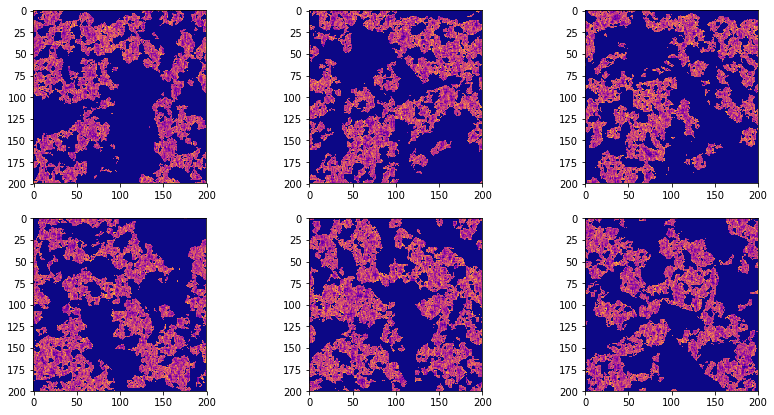

In [16]:
display_random_slices(filename_includes="z006.5" , category_includes="delta_T")#,save_as="delta_T_sample.png")

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[-0.3626744  -0.33285668 -0.3421934  ... -0.57136214 -0.49958983
  -0.3772768 ]
 [-0.37470418 -0.3337835  -0.12610066 ... -0.45555624 -0.5899356
  -0.5540405 ]
 [-0.5691424  -0.30752233  0.05289633 ... -0.6062066  -0.5434294
  -0.6166778 ]
 ...
 [-0.05540768 -0.0042222  -0.20526919 ... -0.21600328  0.33269235
   0.1847096 ]
 [ 0.08384164 -0.06455021 -0.233913   ... -0.5656691  -0.19737093
   0.15294893]
 [-0.09603696 -0.04785202 -0.38701028 ... -0.5780648  -0.37951156
   0.11293697]]
min max mean
-0.92974776 5.237452 0.0019500348


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


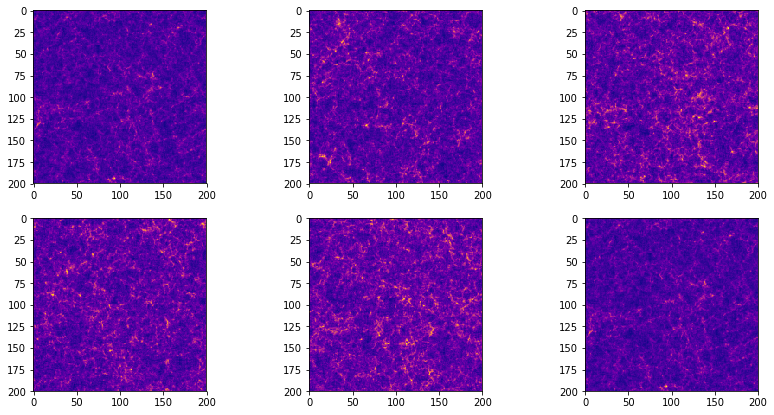

In [17]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_smoothed_deltax")#,save_as="updated_smoothed_deltax_sample.png")

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[-1.7760041e-17 -8.2517826e-18 -5.3498204e-18 ... -4.4867410e-18
  -1.0283359e-17 -1.7684453e-17]
 [-1.5515028e-17 -1.3872214e-17 -8.9673327e-18 ... -6.2000479e-18
  -6.0689307e-18 -1.1597137e-17]
 [-1.0640170e-17 -1.1836927e-17 -9.4011872e-18 ... -1.3446611e-18
   8.6349591e-19 -6.3643165e-18]
 ...
 [ 5.4173051e-18  7.0794575e-18  9.8195479e-18 ...  8.4708407e-18
   4.8189905e-18  4.7604162e-18]
 [ 3.1025994e-18  4.3599987e-18  6.6811746e-18 ...  7.2286669e-18
   4.4159269e-18  3.6988804e-18]
 [-5.2073667e-18 -2.4747672e-19  2.8560218e-18 ...  8.9595737e-19
  -2.5975605e-18 -4.7551503e-18]]
min max mean
-1.02731094e-16 7.807823e-17 -1.1555996e-17


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


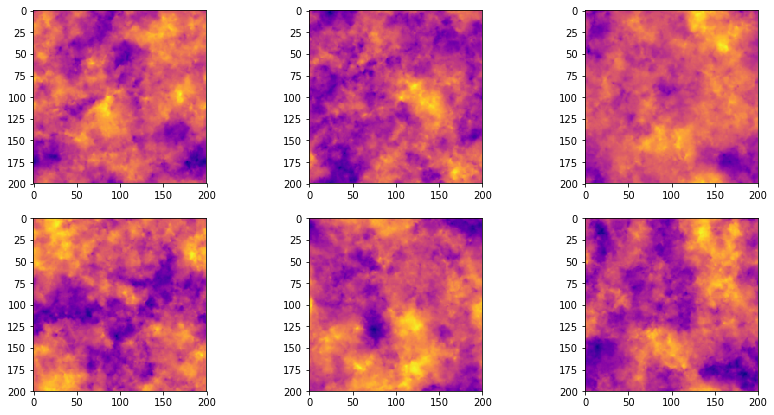

In [18]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_vx")

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[3.1334902e-17 3.3129358e-17 2.9166782e-17 ... 2.0226258e-17
  2.3134104e-17 2.6789197e-17]
 [2.1196045e-17 2.4310167e-17 2.2992706e-17 ... 2.5909216e-17
  2.4528549e-17 2.3442621e-17]
 [2.8720922e-17 2.3863534e-17 2.3521185e-17 ... 3.1237735e-17
  3.5753330e-17 3.3358629e-17]
 ...
 [4.4289963e-17 4.5013419e-17 4.9814947e-17 ... 2.3716453e-17
  3.1541065e-17 3.8999197e-17]
 [3.6209534e-17 3.6297307e-17 3.9942553e-17 ... 2.7679597e-17
  3.3975385e-17 3.6339209e-17]
 [3.1891525e-17 3.0826285e-17 3.1180070e-17 ... 2.0480310e-17
  2.7264561e-17 3.1791962e-17]]
min max mean
-1.140367e-16 1.2646704e-16 3.3881317e-25


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


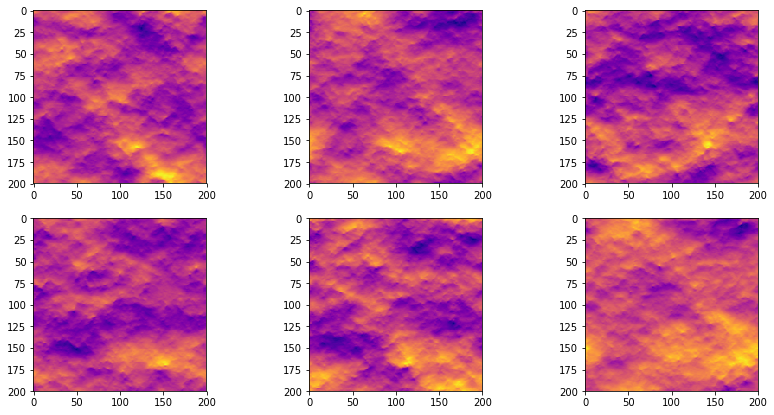

In [19]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_vy")

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[-8.1980163e-17 -8.2619342e-17 -8.2971476e-17 ... -3.8369848e-17
  -5.8357129e-17 -7.8722699e-17]
 [-7.1794592e-17 -7.9609841e-17 -8.5740989e-17 ... -4.2306477e-17
  -5.7090047e-17 -6.8211927e-17]
 [-5.9634336e-17 -7.0225708e-17 -8.6894106e-17 ... -4.7597084e-17
  -5.4035223e-17 -5.6769908e-17]
 ...
 [-7.8515468e-17 -7.9822889e-17 -7.5150113e-17 ... -4.3215045e-17
  -5.1390415e-17 -6.9123527e-17]
 [-8.3116683e-17 -8.4613033e-17 -7.8133039e-17 ... -4.4763537e-17
  -5.4272878e-17 -7.1316138e-17]
 [-8.6364432e-17 -8.4633640e-17 -7.9679397e-17 ... -4.2550303e-17
  -5.6908636e-17 -7.6651982e-17]]
min max mean
-1.280713e-16 1.01446304e-16 -5.426305e-26


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


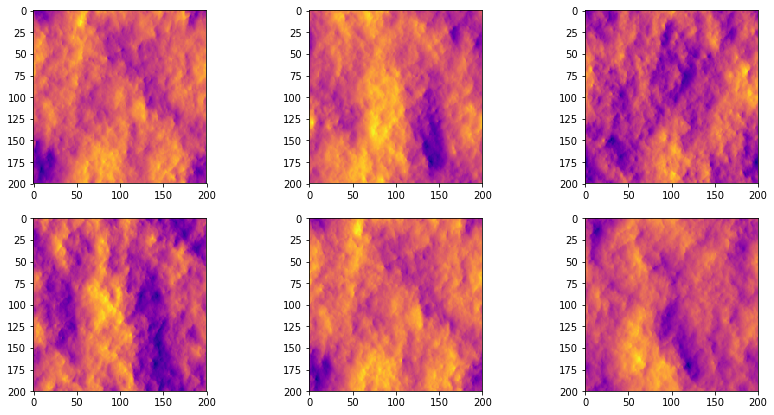

In [20]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_vz")

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
min max mean
0.0 1.0 0.3572055


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


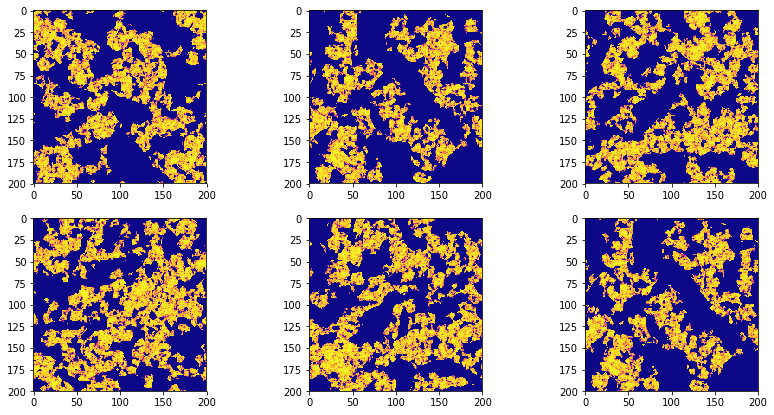

In [21]:
display_random_slices(filename_includes="z006.5" , category_includes="xH_nohalos")

there are  17 files in the category :) 
(200, 200, 200)
what the array looks like:
[[10.  10.   8.5 ...  6.5  8.  10.5]
 [ 9.5  9.5  8.5 ...  6.5  8.  10. ]
 [ 9.   8.5  9.5 ...  7.   8.   8.5]
 ...
 [ 8.5  9.   9.5 ...  7.5  7.5  8.5]
 [ 9.   9.5 10.5 ...  7.   8.   8.5]
 [ 9.5 10.   8.5 ...  7.   7.5  8.5]]
min max mean
-1.0 13.0 4.2012124


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


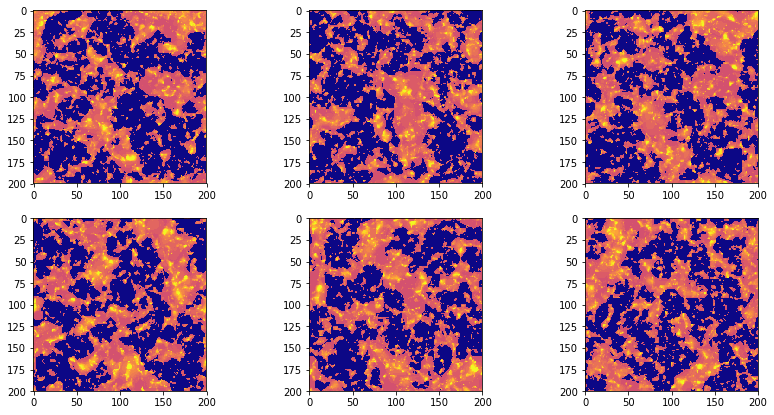

In [22]:
display_random_slices(filename_includes="z006.5" , category_includes="z_first_ionization")

## Playing with the binary file - figure out how the two types of file that I like look like
So the point 